# ตัวอย่างเก่า

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('./data/customer.xlsx')

from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder( categories = [df['gender'].unique()])
df['gender'] = OE.fit_transform( df[['gender']])

df2 = pd.DataFrame()
df2 = df[['gender', 'age', 'salary']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df3 = pd.DataFrame()
df3[['gender', 'age', 'salary']] = scaler.fit_transform(df2)

att = df3
label = df['purchased']
from sklearn.model_selection import train_test_split
att_train, att_test, label_train, label_test = train_test_split(att, label, train_size = 0.8)

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors= 5)
model.fit(att_train,label_train)

label_predict = model.predict(att_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(label_test, label_predict)
score

0.8875

In [53]:
df = pd.read_excel('./data/customer.xlsx')

from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder( categories = [df['gender'].unique()])
df['gender'] = OE.fit_transform( df[['gender']])

df2 = pd.DataFrame()
df2 = df[['gender', 'age', 'salary']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df3 = pd.DataFrame()
df3[['gender', 'age', 'salary']] = scaler.fit_transform(df2)

att = df3
label = df['purchased']


from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors= 5)

from sklearn.model_selection import cross_val_score, StratifiedKFold
skf = StratifiedKFold(n_splits = 5, shuffle = True)

scores = cross_val_score( model, att, label, cv = skf)
scores.mean()

0.9

In [30]:
df = pd.read_csv('./Imbalanced_Dataset.csv')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  1000 non-null   float64
 1   Feature2  1000 non-null   float64
 2   Target    1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [33]:
df['Target'].value_counts()

Target
0    906
1     94
Name: count, dtype: int64

In [60]:
#upder sampling

df.groupby('Target').sample( n = 94 )['Target'].value_counts()

Target
0    94
1    94
Name: count, dtype: int64

In [73]:
#over sampling

from imblearn.over_sampling import SMOTE

att = df[['Feature1', 'Feature2']]
label = df['Target']
smote = SMOTE()
new_att, new_label = smote.fit_resample(att, label)

In [66]:
new_label.value_counts()

Target
0    906
1    906
Name: count, dtype: int64

<Axes: xlabel='Feature1', ylabel='Feature2'>

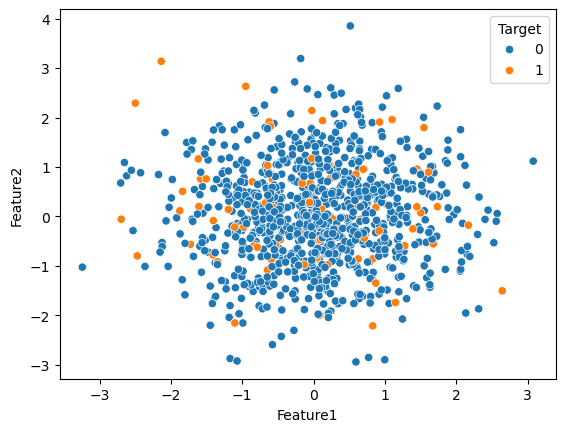

In [67]:
# ก่อนทำ over sampling

sns.scatterplot(data = df, x = 'Feature1', y = 'Feature2', hue = 'Target')

<Axes: xlabel='Feature1', ylabel='Feature2'>

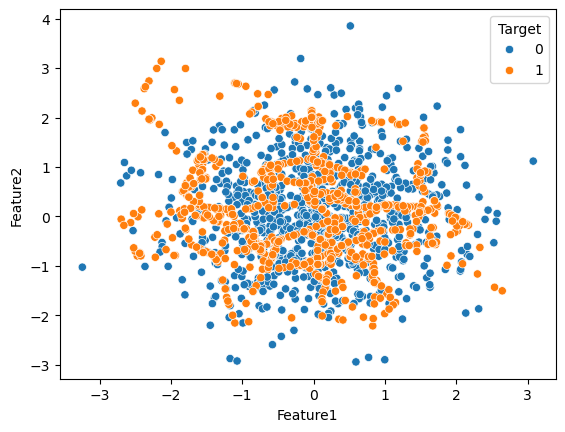

In [74]:
#หลังทำการ over sampling

new_df = pd.DataFrame(new_att, columns = ['Feature1','Feature2'])
new_df['Target'] = new_label
sns.scatterplot(data = new_df, x = 'Feature1', y = 'Feature2', hue = 'Target')

In [83]:
df = pd.read_csv('./data/car_miles_per_gallon.csv')

In [85]:
df.head()

,Name,Year,Origin,Cylinders,Displacement,Horsepower,Weight,Acceleration,MPG
0,Chevrolet Chevelle Malibu,2015,1,8,307.0,130.0,3504,12.0,8.0
1,Buick Skylark 320,2015,1,8,350.0,165.0,3693,11.5,15.0
2,Plymouth Satellite,2015,1,8,318.0,150.0,3436,11.0,18.0
3,Amc Rebel Sst,2015,1,8,304.0,150.0,3433,12.0,16.0
4,Ford Torino,2015,1,8,302.0,140.0,3449,10.5,17.0


In [94]:
df = pd.read_csv('./data/car_miles_per_gallon.csv')

df2 = pd.DataFrame()
df2 = df.dropna()
att = df2[['Displacement', 'Horsepower', 'Weight']]
label = df2['MPG']

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(att, label)

LinearRegression()

In [91]:
model.predict([[300,150,4000]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15.44104433])

In [23]:
df = pd.read_csv('./data/car_miles_per_gallon.csv')

df2 = pd.DataFrame()
df2 = df.dropna()
att = df2[['Displacement', 'Horsepower', 'Weight']]
label = df2['MPG']

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(att, label)

from sklearn.metrics import mean_absolute_error
label_predict = model.predict(att)
score = mean_absolute_error(label, label_predict)
print(score)

3.2544610742496975


# การบ้าน lab 11 - Regression

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./penguins_size.csv')

df2 = pd.DataFrame()
df2 = df.dropna()
att = df2[['flipper_length_mm','culmen_length_mm','culmen_depth_mm']]
label = df2['body_mass_g']

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(att, label)

from sklearn.metrics import mean_absolute_error
label_predict = model.predict(att)
score = mean_absolute_error(label, label_predict)
print(score)

309.47746577600657


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


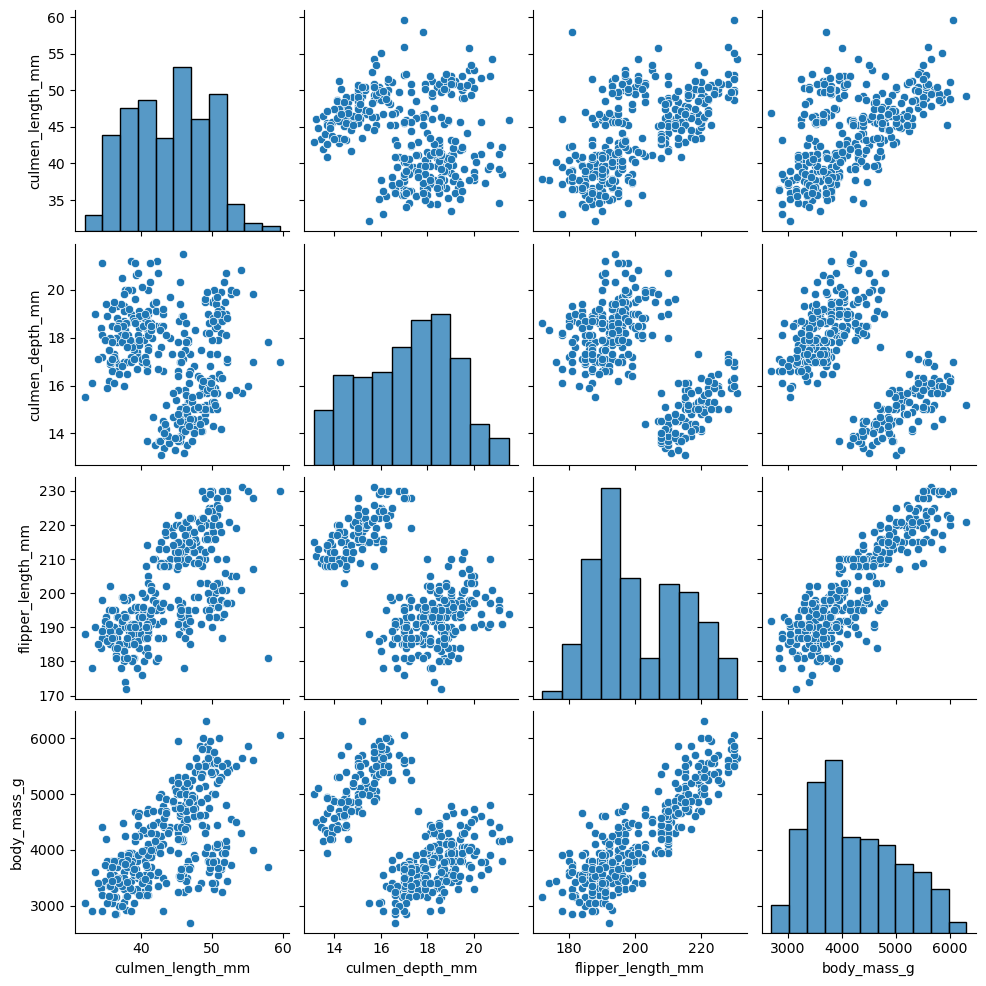

In [30]:
sns.pairplot(df2)

In [57]:
df2

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
